In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_colwidth = 150 ###
df = pd.read_csv('C:/Users/0023ND744/Desktop/my_notebooks/text_analytics/un-general-debates-blueprint.csv')

In [4]:
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth sessi...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,"177.\t : It is a fortunate coincidence that precisely at a time when the United Nations is celebrating its first twenty-five years of existence, a..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,"100.\t It is a pleasure for me to extend to you, Mr. President, the warmest congratulations of the Australia Government and its delegation to thi..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,"155.\t May I begin by expressing to Ambassador Hambro, on behalf of the delegation of Austria, our best wishes on his election as President of th..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to this rostrum, wonders about the usefulness or futility of the speech. Must we still speak when our v..."


In [5]:
df.isnull().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
dtype: int64

In [9]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [18]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 232.1 MB


In [12]:
df.position.value_counts()

Minister for Foreign Affairs                         1813
President                                            1143
Prime Minister                                        524
UN Representative                                     276
Deputy Prime Minister                                 229
                                                     ... 
First Vice-President                                    1
President of  the people's Republic of Mozambique       1
Ministry of External Relations                          1
Acting Head of State                                    1
President                                               1
Name: position, Length: 113, dtype: int64

In [13]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

In [19]:
df.describe(include='O')
#A summary for nonnumerical columns can be produced by specifying include='O' (the alias for np.object).

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,TUR,Syrian Arab Republic,Seyoum Mesfin,Minister for Foreign Affairs,"May I first congratulate you, Sir, on your election as President of this session and pledge Canada's full support.\nI should also like to wish the..."
freq,46,46,12,1813,1


### Exploratory data analysis

use only metadata and record counts to explore data distribution and quality;
- Calculate summary statistics.
- Check for missing values.
- Plot distributions of interesting attributes.
- Compare distributions across categories.
- Visualize developments over time.

In [20]:
# Calculating Summary Statistics for Columns

In [21]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [22]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'length'],
      dtype='object')

In [24]:
df[['country', 'speaker']].describe(include='O')
#As the number of unique values is not useful for textual data, let’s just analyze the country and speaker columns:

,country,speaker
count,7507,7480
unique,199,5428
top,TUR,Seyoum Mesfin
freq,46,12


In [25]:
#The dataset contains data from 199 unique countries and apparently 5,428 speakers. 

### Checking for Missing Data

In [26]:
df.isna().sum()


session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [27]:
df.isnull().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [28]:
# substitute the missing values with some generic value such as unknown speaker or unknown position or just the empty string.

In [29]:
df['speaker'].fillna('unknown', inplace=True)

In [32]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

In [33]:
# duplicate values like same name multiple times
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
George Bush           1
Bush                  1
Mr. George W Bush     1
Name: speaker, dtype: int64

Any analysis on speaker names would produce the wrong results unless we resolve these ambiguities. So, we had better check the distinct values of categorical attributes.

In [35]:
# Plotting Value Distributions

<AxesSubplot:>

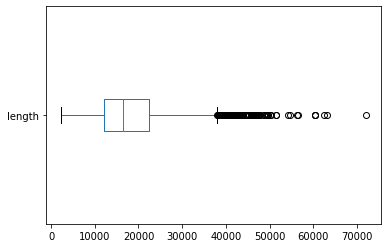

In [36]:
df['length'].plot(kind='box', vert=False)

**As illustrated by this plot, 50% percent of the speeches (the box in the middle) have a length between roughly 12,000 and 22,000 characters, with the median at about 16,000 and a long tail with many outliers to the right. The distribution is obviously left-skewed.**

<AxesSubplot:ylabel='Frequency'>

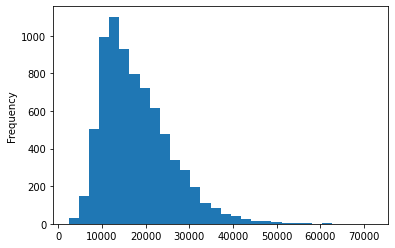

In [37]:
df['length'].plot(kind='hist', bins=30)

### Comparing Value Distributions Across Categories

In [38]:
# Peculiarities in the data often become visible when different subsets of the data are examined. 
# A nice visualization to compare distributions across different categories is Seaborn’s catplot.

** box and violin plots to compare the distributions of the speech length of the five permanent members of the UN security council**

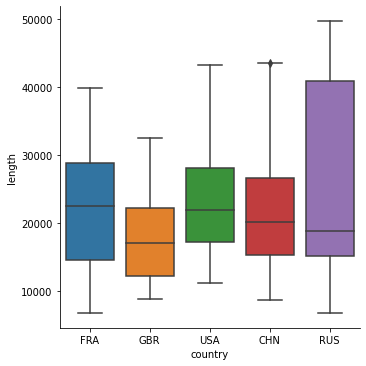

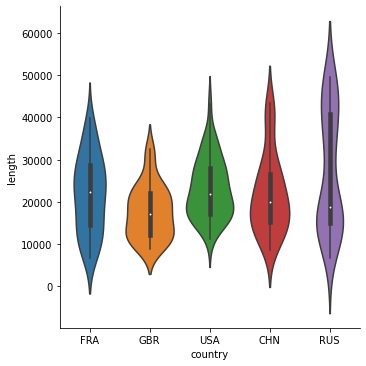

In [39]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x="country", y="length", kind='box')
sns.catplot(data=df[where], x="country", y="length", kind='violin')

**The violin plot is the “smoothed” version of a box plot. Frequencies are visualized by the width of the violin body, while the box is still visible inside the violin. Both plots reveal that the dispersion of values, in this case the lengths of the speeches, for Russia is much larger than for Great Britain. But the existence of multiple peaks, as in Russia, only becomes apparent in the violin plot**

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

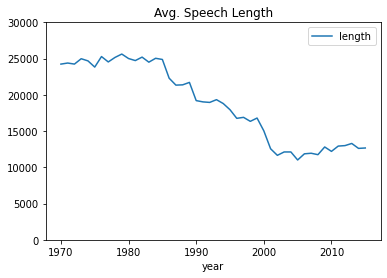

In [40]:
df.groupby('year').agg({'length': 'mean'}).plot(title="Avg. Speech Length", ylim=(0,30000))

### Building a Simple Text Preprocessing Pipeline

The pipeline presented here consists of three steps: 
- case-folding into lowercase, 
- tokenization, and 
- stop word removal. 

In [42]:
# Performing Tokenization with Regular Expressions

In [43]:
#the simplest and fastest tokenizer is Python’s native str.split() method, 

The frequently used expression [A-Za-z] is not a good option for matching letters because it misses accented letters like ä or â. Much better is the POSIX character class \p{L}, which selects all Unicode letters. Note that we need the regex library instead of re to work with POSIX character classes.

The following expression matches tokens consisting of at least one letter (\p{L}), preceded and followed by an arbitrary sequence of alphanumeric characters (\w includes digits, letters, and underscore) and hyphens (-):

In [44]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [45]:
text = "Hello there! I know you from there. What 'r you doing here?'"
tokens = tokenize(text)
print("|".join(tokens))

Hello|there|I|know|you|from|there|What|r|you|doing|here


In [46]:
# Treating Stop Words

In [47]:
# most frequent words in text are common words such as determiners, auxiliary verbs, pronouns, adverbs

In [48]:
import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))

In [49]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [50]:
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

In addition to or instead of a fixed list of stop words, it can be helpful to treat every word that appears in more than, say, 80% of the documents as a stop word. Such common words make it difficult to distinguish content. The parameter max_df of the scikit-learn vectorizers

In [51]:
# create a new column called tokens containing the lowercased, tokenized text without stop words for each document

In [52]:
# change all text to lowercase, tokenize it, and remove stop words. 
# Other operations can be added by simply extending the pipeline

In [53]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [54]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

**The tokens column now consists of Python lists containing the extracted tokens for each document. Of course, this additional column basically doubles memory consumption of the DataFrame, but it allows you to quickly access the tokens directly for further analysis.**

In [55]:
#We also add another column containing the length of the token list for summarizations later:

df['num_tokens'] = df['tokens'].map(len)

In [56]:
df

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth sessi...,51419,"[may, first, convey, president, congratulations, albanian, delegation, election, presidency, twenty-fifth, session, general, assembly, taking, wor...",4125
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,"177.\t : It is a fortunate coincidence that precisely at a time when the United Nations is celebrating its first twenty-five years of existence, a...",29286,"[fortunate, coincidence, precisely, time, united, nations, celebrating, first, twenty-five, years, existence, eminent, jurist, closely, linked, or...",2327
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,"100.\t It is a pleasure for me to extend to you, Mr. President, the warmest congratulations of the Australia Government and its delegation to thi...",31839,"[pleasure, extend, mr, president, warmest, congratulations, australia, government, delegation, general, assembly, election, presidency, distinguis...",2545
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,"155.\t May I begin by expressing to Ambassador Hambro, on behalf of the delegation of Austria, our best wishes on his election as President of th...",26616,"[may, begin, expressing, ambassador, hambro, behalf, delegation, austria, best, wishes, election, president, general, assembly, derive, great, sat...",2135
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to this rostrum, wonders about the usefulness or futility of the speech. Must we still speak when our v...",25911,"[doubt, us, coming, rostrum, wonders, usefulness, futility, speech, still, speak, voices, drowned, mournful, cries, many, victims, world, disorder...",2025
...,...,...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,"On behalf of the people and the Government of Yemen, I would like to congratulate the President most warmly on presiding over the General Assembly...",10568,"[behalf, people, government, yemen, like, congratulate, president, warmly, presiding, general, assembly, seventieth, session, wish, every, success...",880
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establishment of the United Nations. People live differently now; many changes have taken place and many ref...,25430,"[seventy, years, passed, since, establishment, united, nations, people, live, differently, many, changes, taken, place, many, reforms, effected, t...",2089
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,"I should like to congratulate the President and his country, Denmark, on his election as President of the General Assembly at its seventieth sessi...",13662,"[like, congratulate, president, country, denmark, election, president, general, assembly, seventieth, session, south, africa, full, support, presi...",1145
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,"I would like to begin by thanking the Secretary-General and by expressing my gratitude for the convening of this important session, at which we ma...",14247,"[like, begin, thanking, secretary-general, expressing, gratitude, convening, important, session, mark, seventieth, anniversary, united, nations, l...",1184


## Word Frequency Analysis

word frequency analysis ignores the order and the context of the words. This is the idea of the famous bag-of-words model.
The original arrangement in the text is lost; only the frequency of the terms is taken into account. This model does not work well for complex tasks such as sentiment analysis or question answering, but it works surprisingly well for classification and topic modeling. 

In [57]:
# Counting Words with a Counter
# Python’s standard library has a built-in class Counter, which does exactly what you might think: it counts things

In [59]:
from collections import Counter

tokens = tokenize("Mountains are calling is a good quote by Thapa! is are being counted twice?")

counter = Counter(tokens)
print(counter)

Counter({'are': 2, 'is': 2, 'Mountains': 1, 'calling': 1, 'a': 1, 'good': 1, 'quote': 1, 'by': 1, 'Thapa': 1, 'being': 1, 'counted': 1, 'twice': 1})


**To find the most frequent words within a corpus, we need to create a counter from the list of all words in all documents. A naive approach would be to concatenate all documents into a single, giant list of tokens, but that does not scale for larger datasets. It is much more efficient to call the update function of the counter object for each single document.**

In [60]:
counter = Counter()
df['tokens'].map(counter.update)

0       None
1       None
2       None
3       None
4       None
        ... 
7502    None
7503    None
7504    None
7505    None
7506    None
Name: tokens, Length: 7507, dtype: object

In [61]:
# retrieve the most common words in the text with the respective counter function:

print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


The tokens make up the index of the DataFrame, while the frequency values are stored in a column named freq. The rows are sorted so that the most frequent words appear at the head:

In [62]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

In [63]:
freq_df = count_words(df)
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

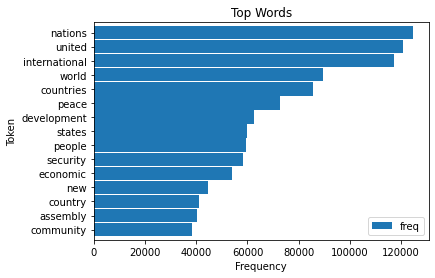

In [64]:
ax = freq_df.head(15).plot(kind='barh', width=0.95) #barh = horizontal bars
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [65]:
# Creating Word Clouds

long words or words with capital letters get unproportionally high attraction.to use it is to instantiate a word cloud object with some options, such as the maximum number of words and a stop word list, and then let the wordcloud module handle the tokenization and stop word removal. 

In [67]:
pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

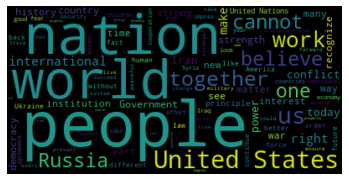

In [68]:
from wordcloud import WordCloud

text = df.query("year==2015 and country=='USA'")['text'].values[0]

wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

**However, this works only for a single text and not a (potentially large) set of documents. For the latter use case, it is much faster to create a frequency counter first and then use the function generate_from_frequencies()**

## Ranking with TF-IDF

highlight words whose actual word frequency in a slice is higher than their total probability would suggest. There is a number of algorithms to measure the “surprise” factor of a word. One of the simplest but best working approaches is to complement the term frequency with the inverse document frequency (see sidebar).

**The inverse document frequency (IDF) is a weighting factor that measures the “unusualness” of a term in a corpus. It is often used to reduce the influence of common terms for data analysis or machine learning. Terms appearing in many documents have a high document frequency. Based on this, we can define the inverse document frequency**

In [69]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens)) #each token is counted only once per document (counter.update(set(tokens))), and the IDF values are computed after counting. 

    # count tokens
    counter = Counter()
    df[column].map(update)

    # create DataFrame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1 # formula for calculating tf-idf
    idf_df.index.name = 'token'
    return idf_df

In [70]:
#The IDF values need to be computed once for the entire corpus 

# create a DataFrame containing the IDF values for each token (idf_df) with this function:

idf_df = compute_idf(df)

<ipython-input-69-03443dead7e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1 # formula for calculating tf-idf


In [71]:
#As both the IDF and the frequency DataFrame have an index consisting of the tokens, we can simply multiply the columns of both DataFrames to calculate the TF-IDF score for the terms:

freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

## Analyzing N-Grams

**It is helpful to extend frequency analyses from single words to short sequences of two or three words.**

In text processing, we usually work with bigrams (sequences of length 2), sometimes even trigrams (length 3). n-grams of size 1 are single words, also called unigrams. The reason to stick to n<3   is that the number of different n-grams increases exponentially with respect to n, while their frequencies decrease in the same way.

In [72]:
# function produces elegantly the set of n-grams for a sequence of tokens

def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens, 2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


**t is advisable to build bigrams without stop words. But we need to be careful: if we remove the stop words first and then build the bigrams, we generate bigrams that don’t exist in the original text as a “manifestation global” in the example. Thus, we create the bigrams on all tokens but keep only those that do not contain any stop words with this modified ngrams function:**

In [73]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

print("Bigrams:", "|".join(ngrams(tokens, 2, stopwords=stopwords)))
print("Trigrams:", "|".join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams: visible manifestation|global climate|climate change
Trigrams: global climate change


In [74]:
# Using this ngrams function, we can add a column containing all bigrams to our DataFrame and
# apply the word count blueprint to determine the top five bigrams:

In [75]:
df['bigrams'] = df['text'].apply(prepare, pipeline=[str.lower, tokenize]) \
                          .apply(ngrams, n=2, stopwords=stopwords)

count_words(df, 'bigrams').head(5)

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


In [ ]:
# add the bigram IDF values, compute the TF-IDF-weighted bigram frequencies for all speeches from 2015, and generate a word cloud from the resulting DataFrame: